# Simulation of CMB maps and power spectra

What this code does:


- simulation of several maps from Planck data and verify that the maps are different (random part during the creation of the maps),
- plot their power spectra (TT, EE and TE) and compare them with the ones of the input power spectra of Planck,
- comparison of the influences (on the power spectra) of the beam and pixel window function during the creation of the maps and verification that it is possible to correct their influences to have power spectra similar to the input ones again,
- average up to 10 maps to see that the power spectra are getting closer to the ones of Planck.

In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import time
from scipy.stats import binned_statistic

import warnings
warnings.filterwarnings("ignore")

### Download of the Planck Legacy Archive data.

Text(0.5, 0, '$\\ell$')

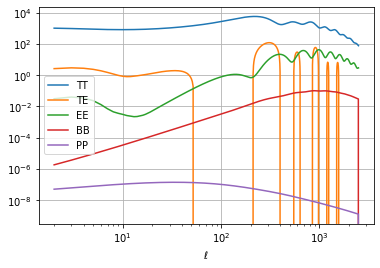

In [2]:
PLA_best_PS = pd.read_csv("COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01_copie.txt", delim_whitespace=True, index_col=0) # taking the PLA power spectrum
#PLA_best_PS
PLA_best_PS.plot(logx=True, logy=True, grid=True)
plt.xlabel('$\ell$')

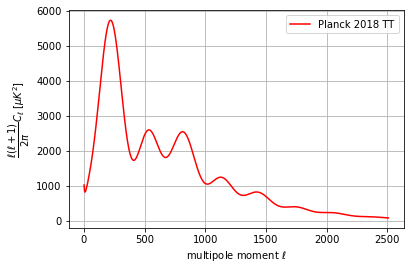

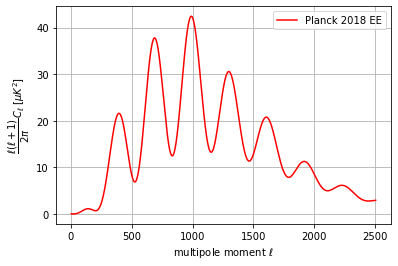

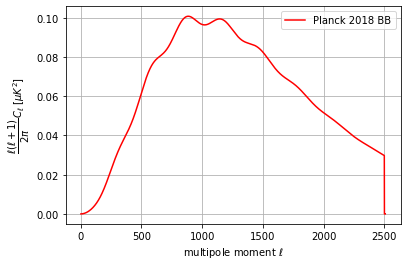

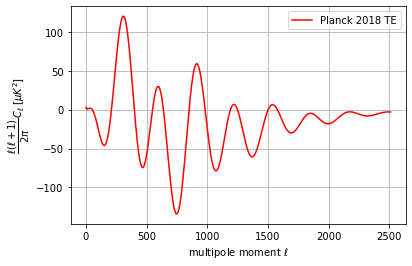

In [3]:
lmax = PLA_best_PS.index[-1]
PLA_PS = np.loadtxt("COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt")

plt.plot(PLA_PS[:lmax,0],PLA_PS[:lmax,1], color='r', linestyle='-', label='Planck 2018 TT')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend()
plt.grid()
plt.show()

plt.plot(PLA_PS[:lmax,0],PLA_PS[:lmax,3], color='r', linestyle='-', label='Planck 2018 EE')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend()
plt.grid()
plt.show()

plt.plot(PLA_PS[:lmax,0],PLA_PS[:lmax,4], color='r', linestyle='-', label='Planck 2018 BB')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend()
plt.grid()
plt.show()

plt.plot(PLA_PS[:lmax,0],PLA_PS[:lmax,2], color='r', linestyle='-', label='Planck 2018 TE')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend()
plt.grid()
plt.show()

Choose the value of Nside and lmax:

In [4]:
max_size = False
if max_size : # high value of Nside
    nside = 1024
    lmax = PLA_best_PS.index[-1]
else :        # low value of Nside
    nside = 512
    lmax = 2 * nside -1

cl = PLA_best_PS.divide(PLA_best_PS.index * (PLA_best_PS.index+1) / (2*np.pi), axis="index")
cl /= 1e12 # in muK^2
cl = cl.reindex(np.arange(0, lmax+1)) # re index because it begins at 2
cl = cl.fillna(0) # replace the 1st values by 0 instead of NaN
cl

TT            TE            EE            BB            PP
#                                                                         
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
1     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
2     1.064717e-09  2.741071e-12  3.234029e-14  1.904297e-18  5.250146e-20
3     5.046063e-10  1.538365e-12  2.078179e-14  1.904554e-18  3.193654e-20
4     2.867043e-10  8.666586e-13  1.083730e-14  1.904889e-18  2.207258e-20
...            ...           ...           ...           ...           ...
1019  6.305673e-15 -2.878370e-16  2.424350e-16  5.823272e-19  3.865334e-26
1020  6.294588e-15 -2.939785e-16  2.409948e-16  5.811811e-19  3.851487e-26
1021  6.283896e-15 -3.000040e-16  2.395351e-16  5.800443e-19  3.837706e-26
1022  6.273714e-15 -3.059097e-16  2.380571e-16  5.789163e-19  3.823983e-26
1023  6.264340e-15 -3.116791e-16  2.365521e-16  5.777982e-19  3.810324e-26

[1024 rows x 5 columns]

### Simulation of 2 CMB maps in temperature and polarization

In [5]:
seed = 583
np.random.seed(seed)

In [6]:
fwhm = 10 * np.pi / (60*180) # 10 arcmin in rad

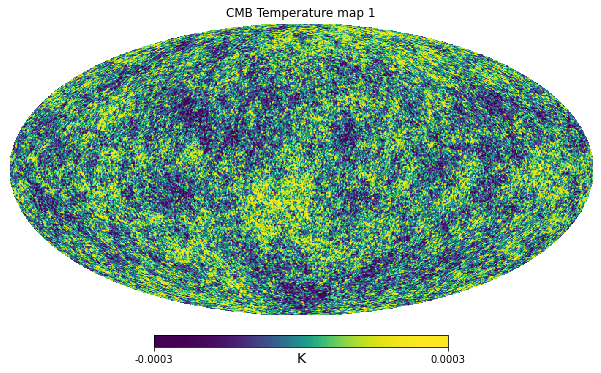

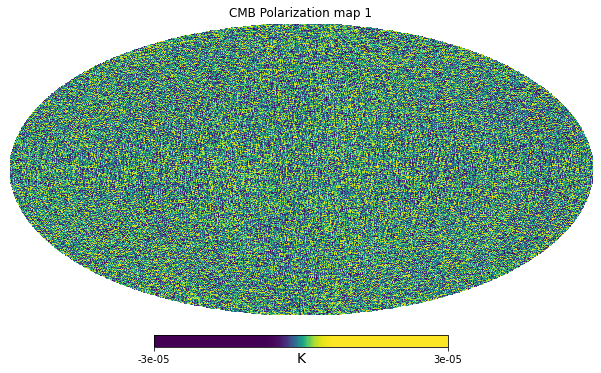

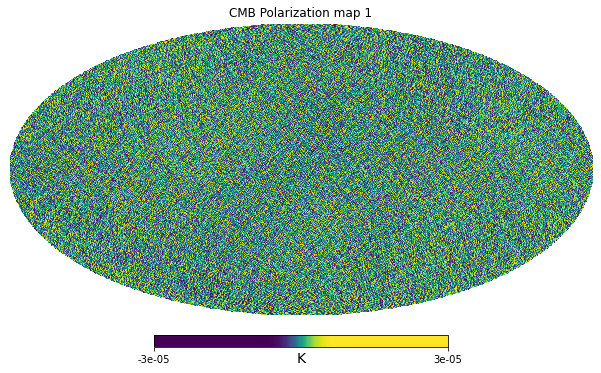

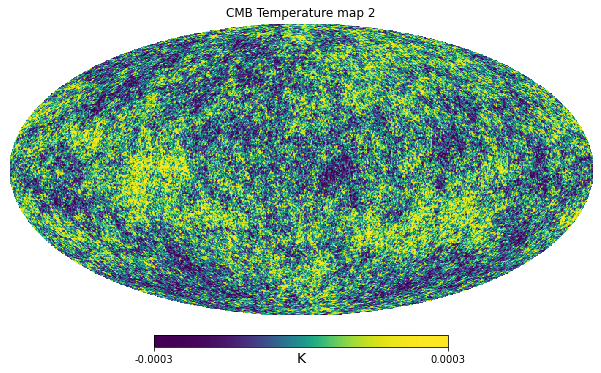

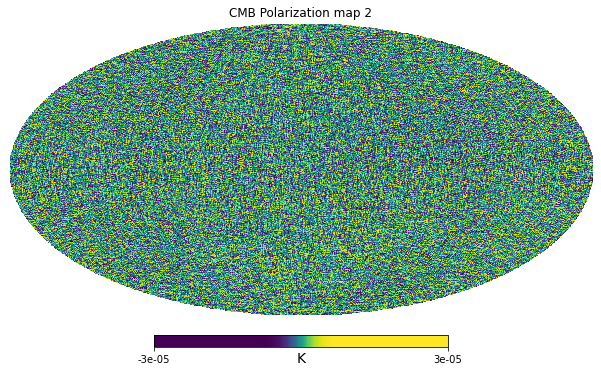

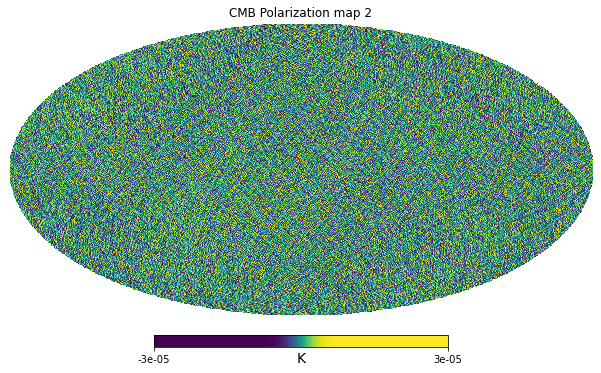

In [7]:
alm1 = hp.synalm((cl.TT, cl.EE, cl.BB, cl.TE), lmax=lmax, new=True) # creation of alm from cl
CMB_map1 = hp.alm2map(alm1, nside=nside, lmax=lmax, pixwin=True, fwhm=fwhm) # returns a list of T,Q,U maps from alm
hp.mollview(CMB_map1[0], norm='hist', min=-300*1e-6, max=300*1e-6, unit="K", title="CMB Temperature map 1")

for m in CMB_map1[1:]: # Q and U maps
    hp.mollview(m, norm='hist', min=-30*1e-6, max=30*1e-6, unit="K", title="CMB Polarization map 1")

alm2 = hp.synalm((cl.TT, cl.EE, cl.BB, cl.TE), lmax=lmax, new=True) # creation of alm from cl
CMB_map2 = hp.alm2map(alm2, nside=nside, lmax=lmax, pixwin=True, fwhm=fwhm) # returns a list of T,Q,U maps from alm
hp.mollview(CMB_map2[0], norm='hist', min=-300*1e-6, max=300*1e-6, unit="K", title="CMB Temperature map 2")

for m in CMB_map2[1:]:
    hp.mollview(m, norm='hist', min=-30*1e-6, max=30*1e-6, unit="K", title="CMB Polarization map 2")

Let's check if the two simulated maps are different. (They are different.)

In [8]:
CMB_map1 == CMB_map2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

### Computation of the power spectra

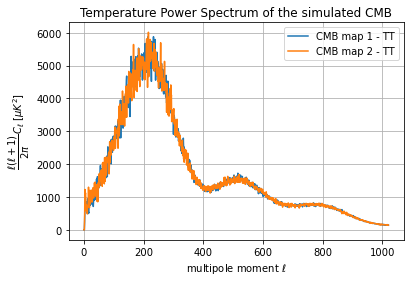

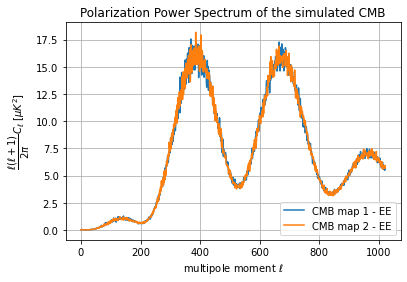

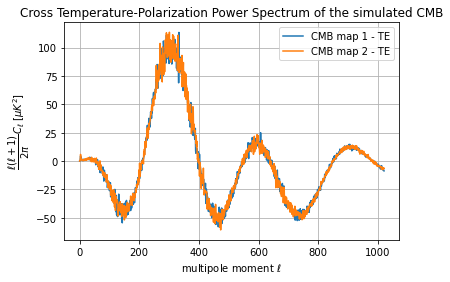

In [9]:
PS1 = hp.sphtfunc.anafast(CMB_map1, lmax=lmax)
PS2 = hp.sphtfunc.anafast(CMB_map2, lmax=lmax)

ell = np.arange(PS1.shape[1])
PS1 *= ell * (ell+1) * 1e12 / (2*np.pi) # Dl=l(l+1)Cl/2pi in muK^2
PS2 *= ell * (ell+1) * 1e12 / (2*np.pi)

# Variance
delta_Cl1 = []
delta_Cl2 = []
for i in range(len(PS1)):
    delta_Cl1.append([math.sqrt(2/(2*l+1))*PS1[i][l] for l in range(len(PS1[i]))])
    delta_Cl2.append([math.sqrt(2/(2*l+1))*PS2[i][l] for l in range(len(PS2[i]))])


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.title('Temperature Power Spectrum of the simulated CMB')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(PS1[0][:-2], label="CMB map 1 - TT")
plt.plot(PS2[0][:-2], label="CMB map 2 - TT")
plt.legend()
plt.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.title('Polarization Power Spectrum of the simulated CMB')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(PS1[1][:-2], label="CMB map 1 - EE")
plt.plot(PS2[1][:-2], label="CMB map 2 - EE")
plt.legend()
plt.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.title('Cross Temperature-Polarization Power Spectrum of the simulated CMB')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(PS1[3][:-2], label="CMB map 1 - TE")
plt.plot(PS2[3][:-2], label="CMB map 2 - TE")
plt.legend()
plt.grid()
plt.show()

### Average power spectra and comparison with the one of the Plank Legacy Archive

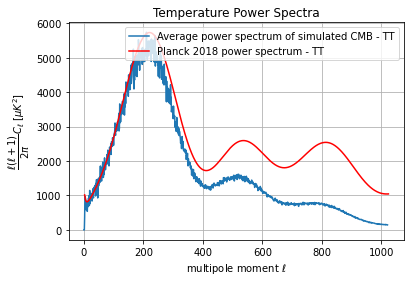

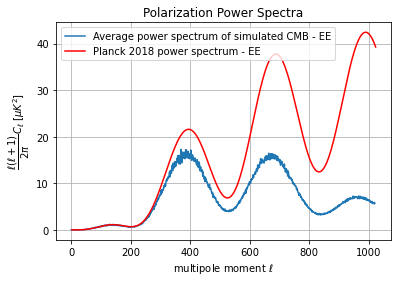

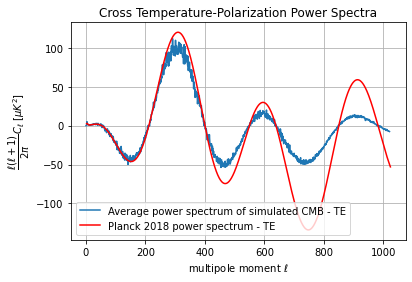

In [10]:
average_PS = (PS1+PS2)/2
average_delta_Cl = list(np.array(delta_Cl1)+np.array(delta_Cl2)/2)
PLA_best_PS = np.loadtxt("COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt")

plt.title('Temperature Power Spectra')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(average_PS[0][:-2], label='Average power spectrum of simulated CMB - TT')
#plt.errorbar(ell,average_PS[0], yerr=delta_Cl[0], ecolor='k', label="CMB map 1 - TT with error bars")
plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,1], color='r', linestyle='-', label='Planck 2018 power spectrum - TT')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.title('Polarization Power Spectra')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(average_PS[1][:-2], label='Average power spectrum of simulated CMB - EE')
#plt.errorbar(ell,average_PS[1], yerr=delta_Cl[1], ecolor='k', label="CMB map 1 - EE with error bars")
plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,3], color='r', linestyle='-', label='Planck 2018 power spectrum - EE')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.title('Cross Temperature-Polarization Power Spectra')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(average_PS[3][:-2], label='Average power spectrum of simulated CMB - TE')
#plt.errorbar(ell,average_PS[3], yerr=delta_Cl[3], ecolor='k', label="CMB map 1 - TE with error bars")
plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,2], color='r', linestyle='-', label='Planck 2018 power spectrum - TE')
plt.legend(loc='best')
plt.grid()
plt.show()

### Comparision of the power spectra with and without beam and pixel window function

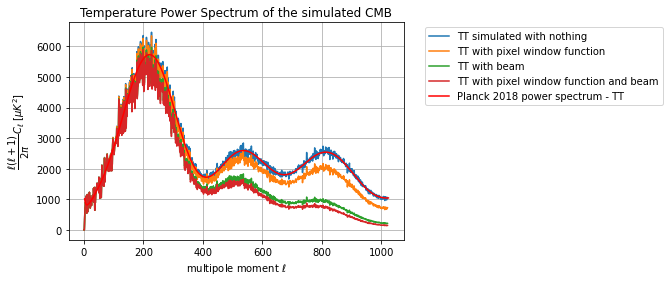

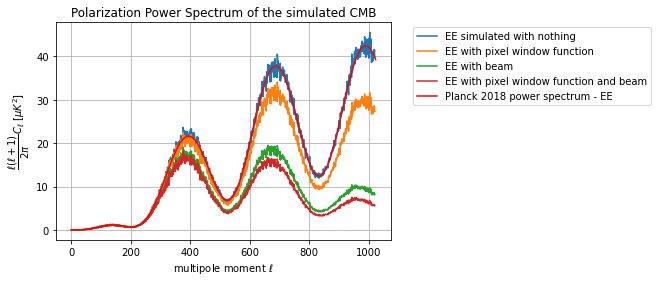

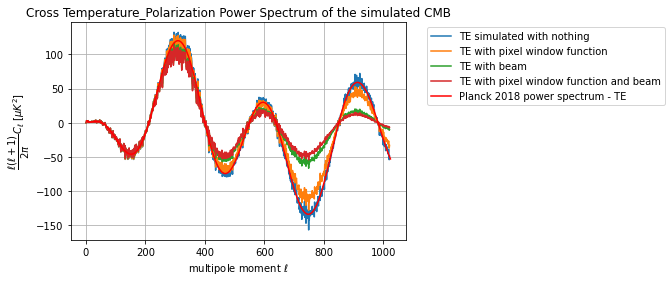

67.20476508140564 sec


In [11]:
start_time = time.time()

PLA_best_PS = np.loadtxt("COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt")
alm = hp.synalm((cl.TT, cl.EE, cl.BB, cl.TE), lmax=lmax, new=True)

CMB_map_nothing = hp.alm2map(alm, nside=nside, lmax=lmax, pixwin=False, fwhm=0)
CMB_map_pixwin = hp.alm2map(alm, nside=nside, lmax=lmax, pixwin=True, fwhm=0)
CMB_map_beam = hp.alm2map(alm, nside=nside, lmax=lmax, pixwin=False, fwhm=fwhm)
CMB_map_pixwin_beam = hp.alm2map(alm, nside=nside, lmax=lmax, pixwin=True, fwhm=fwhm)

PS_nothing = hp.sphtfunc.anafast(CMB_map_nothing, lmax=lmax)
PS_pixwin = hp.sphtfunc.anafast(CMB_map_pixwin, lmax=lmax)
PS_beam = hp.sphtfunc.anafast(CMB_map_beam, lmax=lmax)
PS_pixwin_beam = hp.sphtfunc.anafast(CMB_map_pixwin_beam, lmax=lmax)

ell = np.arange(PS_nothing.shape[1])

PS_nothing *= ell * (ell+1) * 1e12 / (2*np.pi)
PS_pixwin *= ell * (ell+1) * 1e12 / (2*np.pi)
PS_beam *= ell * (ell+1) * 1e12 / (2*np.pi)
PS_pixwin_beam *= ell * (ell+1) * 1e12 / (2*np.pi)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.title('Temperature Power Spectrum of the simulated CMB')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(PS_nothing[0][:-2], label="TT simulated with nothing") #, linestyle = 'none', marker = 'o', markersize = 0.5)
plt.plot(PS_pixwin[0][:-2], label="TT with pixel window function")
plt.plot(PS_beam[0][:-2], label="TT with beam")
plt.plot(PS_pixwin_beam[0][:-2], label="TT with pixel window function and beam")
plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,1], color='r', linestyle='-', label='Planck 2018 power spectrum - TT')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.title('Polarization Power Spectrum of the simulated CMB')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(PS_nothing[1][:-2], label="EE simulated with nothing")
plt.plot(PS_pixwin[1][:-2], label="EE with pixel window function")
plt.plot(PS_beam[1][:-2], label="EE with beam")
plt.plot(PS_pixwin_beam[1][:-2], label="EE with pixel window function and beam")
plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,3], color='r', linestyle='-', label='Planck 2018 power spectrum - EE')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.title('Cross Temperature_Polarization Power Spectrum of the simulated CMB')
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(PS_nothing[3][:-2], label="TE simulated with nothing")
plt.plot(PS_pixwin[3][:-2], label="TE with pixel window function")
plt.plot(PS_beam[3][:-2], label="TE with beam")
plt.plot(PS_pixwin_beam[3][:-2], label="TE with pixel window function and beam")
plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,2], color='r', linestyle='-', label='Planck 2018 power spectrum - TE')
plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

print((time.time() - start_time), "sec")

### Binned Power Spectrum

In [12]:
fwhm = 20 * np.pi / (60*180) # 10 arcmin in rad

In [13]:
alm = hp.synalm((cl.TT, cl.EE, cl.BB, cl.TE), lmax=lmax, new=True) # creation of alm from cl
CMB_map = hp.alm2map(alm, nside=nside, lmax=lmax, pixwin=True, fwhm=fwhm) # returns a list of T,Q,U maps from alm

Cl = hp.sphtfunc.anafast(CMB_map, lmax=lmax)

ell = np.arange(Cl.shape[1])
sigma = fwhm/2.35
    
Cl_beam = np.exp(- ell*(ell+1) * sigma**2)
Bl_pixwin = hp.sphtfunc.pixwin(nside, pol=True, lmax=lmax)
Cl_pixwin = [Bl_pixwin[i]**2 for i in range(len(Bl_pixwin))] # Cl = Bl^2

Cl[0] /= (Cl_beam * Cl_pixwin[0]) # TT
Cl[1] /= (Cl_beam * Cl_pixwin[0]) # EE
Cl[3] /= (Cl_beam * Cl_pixwin[0]) # TE
    
Cl *= ell * (ell+1) * 1e12 / (2*np.pi)

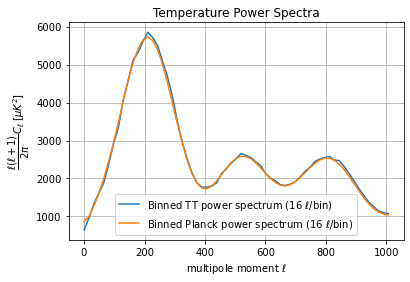

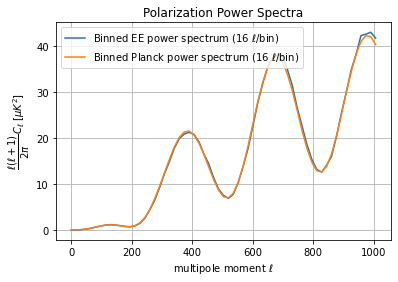

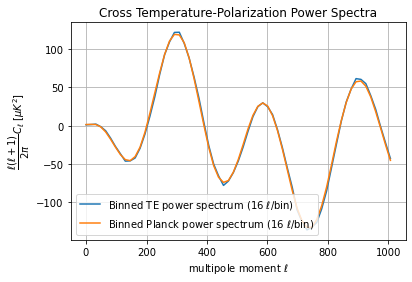

In [14]:
bin_size = 16
number_of_bins = int(lmax/bin_size)  # each bin contains bin_size values of l

#x = ell[:number_of_bins]
#x_ticks_place = []
#x_ticks_name = []
#for l in ell:
#    if l%200==0:
#        x_ticks_place.append(l*number_of_bins/lmax)
#        x_ticks_name.append(l)

x = ell[:number_of_bins]
x_new = []
for i in range(len(x)):
    x_new.append(x[i]*lmax/number_of_bins)

bin_means = binned_statistic(ell, Cl, statistic='mean', bins=number_of_bins)
bin_PLA_PS = binned_statistic(ell, PLA_best_PS.T[:,:lmax+1], statistic='mean', bins=number_of_bins)

#plt.xticks(x_ticks_place, x_ticks_name)
plt.title("Temperature Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(x_new,bin_means[0][0], label='Binned TT power spectrum (%s $\ell$/bin)' %bin_size)
plt.plot(x_new,bin_PLA_PS[0][1], label='Binned Planck power spectrum (%s $\ell$/bin)' %bin_size)
#plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,1], color='r', linestyle='-', label='Planck 2018 TT')
plt.legend()
plt.grid()
plt.show()

plt.title("Polarization Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(x_new,bin_means[0][1], label='Binned EE power spectrum (%s $\ell$/bin)' %bin_size)
plt.plot(x_new,bin_PLA_PS[0][3], label='Binned Planck power spectrum (%s $\ell$/bin)' %bin_size)
#plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,3], color='r', linestyle='-', label='Planck 2018 EE')
plt.legend()
plt.grid()
plt.show()

plt.title("Cross Temperature-Polarization Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.plot(x_new,bin_means[0][3], label='Binned TE power spectrum (%s $\ell$/bin)' %bin_size)
plt.plot(x_new,bin_PLA_PS[0][2], label='Binned Planck power spectrum (%s $\ell$/bin)' %bin_size)
#plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,2], color='r', linestyle='-', label='Planck 2018 TE')
plt.legend()
plt.grid()
plt.show()

### Loop that gives the new mean power spectrum for more CMB maps that have beam and pixel window function

In [15]:
number_of_maps = 10 # number of maps that we want to average (at maximum)
CMB_maps = [] # list of the maps
CMB_PS = []   # list of the power spectra
delta_Cl_list = []
delta_average_list = []
y_average_CMB_PS = [] # list of the averaged power spectra for 1,2,... maps (np.shape=(number_of_maps,6,lmax))
y_subtraction = [] # list of the difference between the averaged PS and the Planck PS (np.shape=(number_of_maps,3,lmax))

start_time = time.time()

for i in range(number_of_maps):
    # creation of the maps
    alm = hp.synalm((cl.TT, cl.EE, cl.BB, cl.TE), lmax=lmax, new=True)
    CMB_map = hp.alm2map(alm, nside=nside, lmax=lmax, pixwin=True, fwhm=fwhm) # returns a list of T,Q,U maps
    CMB_maps.append(CMB_map) # optionnal
    
    # power spectra of the maps
    Cl = hp.sphtfunc.anafast(CMB_map, lmax=lmax)
    ell = np.arange(Cl.shape[1])
    Dl = Cl * ell * (ell+1) * 1e12 / (2*np.pi)
    CMB_PS.append(Dl)
    
    # variance
    delta_Cl = []
    for j in range(len(Dl)):
        delta = [math.sqrt(2/(2*l+1))*Dl[j][l] for l in range(len(Dl[j]))]
        delta_Cl.append(delta)
    delta_Cl_list.append(delta_Cl)
    
    # average power spectra of the maps
    Cl_average = 0
    for j in range(len(CMB_PS)):
        Cl_average += np.array(CMB_PS[j])
    Cl_average = Cl_average/(i+1)
    Cl_average = list(Cl_average) # np.shape(Cl_average) = (6, 2509)
    y_average_CMB_PS.append(Cl_average)
    
    # average of the variances (optionnal)
    delta_average = 0
    for j in range(len(delta_Cl_list)):
        delta_average += np.array(delta_Cl_list[j])
    delta_average = delta_average/(i+1)
    delta_average = list(delta_average)
    delta_average_list.append(delta_average)
    
    # subtraction of Cl_average and Planck PS
    # PLA_best_PS = l, TT, TE, EE, BB, PP
    # Cl = TT, EE, BB, TE, EB, TB
    y_total = []
    y_TT = list(abs(np.array(Cl_average[0][:])-np.array(PLA_best_PS.T[1,:lmax+1])))
    y_EE = list(abs(np.array(Cl_average[1][:])-np.array(PLA_best_PS.T[3,:lmax+1])))
    y_TE = list(abs(np.array(Cl_average[3][:])-np.array(PLA_best_PS.T[2,:lmax+1])))
    y_total.append(y_TT)
    y_total.append(y_EE)
    y_total.append(y_TE)
    y_subtraction.append(y_total) # np.shape = (number_of_maps,3,lmax)    

print((time.time() - start_time)/60, "min")    

3.0218095660209654 min


Plot of the evolution of the average power spectra with repsect to the Planck 2018 ones:

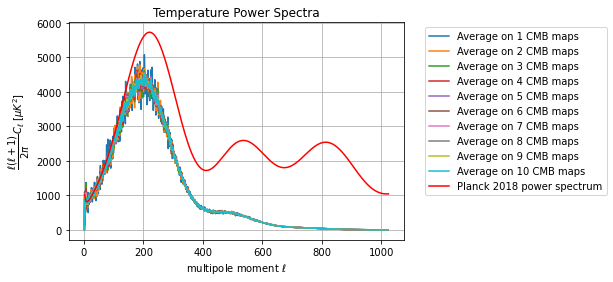

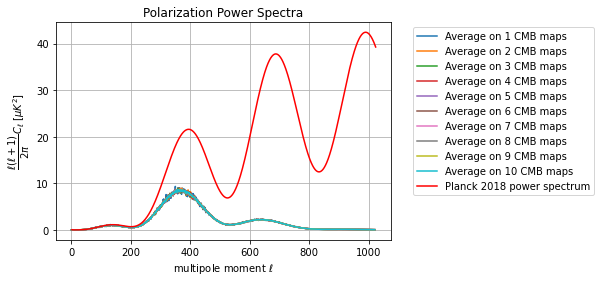

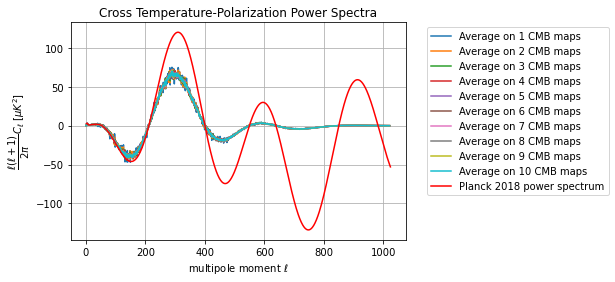

In [16]:
for k in range(number_of_maps): # plot of the average TT power spectra
    plt.plot(y_average_CMB_PS[k][0][:-2], label='Average on %s CMB maps'%(k+1))

plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,1], color='r', linestyle='-', label='Planck 2018 power spectrum')
plt.title("Temperature Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

for k in range(number_of_maps): # plot of the average EE power spectra
    plt.plot(y_average_CMB_PS[k][1][:-2], label='Average on %s CMB maps'%(k+1))

plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,3], color='r', linestyle='-', label='Planck 2018 power spectrum')
plt.title("Polarization Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

for k in range(number_of_maps): # plot of the average TE power spectra
    plt.plot(y_average_CMB_PS[k][3][:-2], label='Average on %s CMB maps'%(k+1))

plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,2], color='r', linestyle='-', label='Planck 2018 power spectrum')
plt.title("Cross Temperature-Polarization Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

Plot of the evolution of the difference between the average power spectra and the Planck 2018 one (with beam and pixel window function):

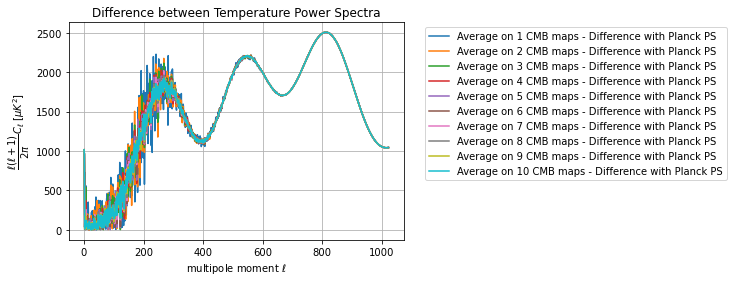

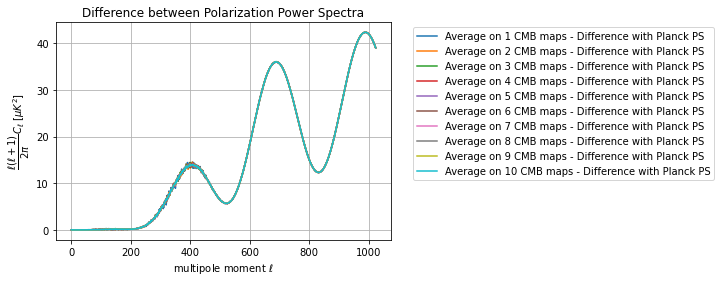

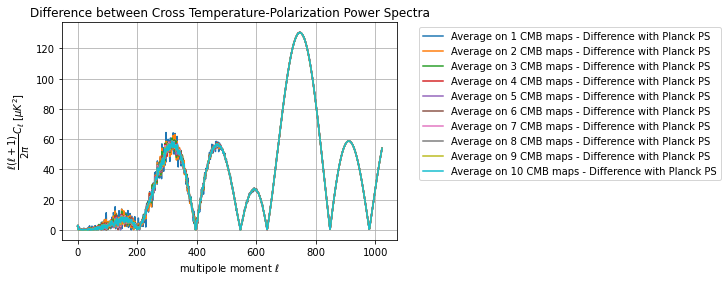

In [17]:
for k in range(number_of_maps): # plot of the average TT power spectra
    plt.plot(ell,y_subtraction[k][0], label='Average on %s CMB maps - Difference with Planck PS'%(k+1))

plt.title("Difference between Temperature Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

for k in range(number_of_maps): # plot of the average EE power spectra
    plt.plot(ell,y_subtraction[k][1], label='Average on %s CMB maps - Difference with Planck PS'%(k+1))

plt.title("Difference between Polarization Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

for k in range(number_of_maps): # plot of the average TE power spectra
    plt.plot(ell,y_subtraction[k][2], label='Average on %s CMB maps - Difference with Planck PS'%(k+1))

plt.title("Difference between Cross Temperature-Polarization Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()

### Loop that gives the new mean power spectrum for more CMB maps with the correction for the beam and pixel window function

In [18]:
number_of_maps = 10 # number of maps that we want to average (at maximum)
CMB_maps = [] # list of the maps
CMB_PS = []   # list of the power spectra

delta_Cl_list = []
delta_average_list = []

y_average_CMB_PS = [] # list of the averaged power spectra for 1,2,... maps (np.shape=(number_of_maps,6,lmax))
y_subtraction = [] # list of the difference between the averaged PS and the Planck PS (np.shape=(number_of_maps,3,lmax))


bin_size = 16
number_of_bins = int(lmax/bin_size)  # each bin contains bin_size values of l
x = ell[:number_of_bins]
x_new = []
for i in range(len(x)):
    x_new.append(x[i]*lmax/number_of_bins)
bin_means_list = [] # list of the mean Cl for each band

bin_PLA_PS = binned_statistic(ell, PLA_best_PS.T[:,:lmax+1], statistic='mean', bins=number_of_bins)

start_time = time.time()

for i in range(number_of_maps):
    # creation of the maps
    alm = hp.synalm((cl.TT, cl.EE, cl.BB, cl.TE), lmax=lmax, new=True)
    CMB_map = hp.alm2map(alm, nside=nside, lmax=lmax, pixwin=True, fwhm=fwhm) # returns a list of T,Q,U maps
    CMB_maps.append(CMB_map) # optionnal
    
    # power spectra of the maps
    Cl = hp.sphtfunc.anafast(CMB_map, lmax=lmax)
    
    # correction for beam and pixel window function
    ell = np.arange(Cl.shape[1])
    sigma = fwhm/2.35
    
    Cl_beam = np.exp(- ell*(ell+1) * sigma**2)
    Bl_pixwin = hp.sphtfunc.pixwin(nside, pol=True, lmax=lmax)
    Cl_pixwin = [Bl_pixwin[i]**2 for i in range(len(Bl_pixwin))] # Cl = Bl^2

    Cl[0] /= (Cl_beam * Cl_pixwin[0]) # TT  # Cl_pixwin[0] and Cl_pixwin[1] are identical
    Cl[1] /= (Cl_beam * Cl_pixwin[0]) # EE
    Cl[3] /= (Cl_beam * Cl_pixwin[0]) # TE
    
    Dl = Cl * ell * (ell+1) * 1e12 / (2*np.pi)
    CMB_PS.append(Dl)
    
    # variance
    delta_Cl = []
    for j in range(len(Dl)):
        delta = [math.sqrt(2/(2*l+1))*Dl[j][l] for l in range(len(Dl[j]))]
        delta_Cl.append(delta)
    delta_Cl_list.append(delta_Cl)
    
    # average power spectra of the maps
    Cl_average = 0
    for j in range(len(CMB_PS)):
        Cl_average += np.array(CMB_PS[j])
    Cl_average = Cl_average/(i+1)
    Cl_average = list(Cl_average) # np.shape(Cl_average) = (6, 2509)
    y_average_CMB_PS.append(Cl_average)
    
    # average of the variances (optionnal)
    delta_average = 0
    for j in range(len(delta_Cl_list)):
        delta_average += np.array(delta_Cl_list[j])
    delta_average = delta_average/(i+1)
    delta_average = list(delta_average)
    delta_average_list.append(delta_average)

    bin_means = binned_statistic(ell, Cl_average, statistic='mean', bins=number_of_bins)
    bin_means_list.append(bin_means)
    
    # subtraction of Cl_average and Planck PS
    # PLA_best_PS = l, TT, TE, EE, BB, PP
    # Cl = TT, EE, BB, TE, EB, TB
    y_total = []
    y_TT = list(abs(np.array(Cl_average[0][:])-np.array(PLA_best_PS.T[1,:lmax+1])))
    y_EE = list(abs(np.array(Cl_average[1][:])-np.array(PLA_best_PS.T[3,:lmax+1])))
    y_TE = list(abs(np.array(Cl_average[3][:])-np.array(PLA_best_PS.T[2,:lmax+1])))
    y_total.append(y_TT)
    y_total.append(y_EE)
    y_total.append(y_TE)
    y_subtraction.append(y_total) # np.shape = (number_of_maps,3,lmax)    

print((time.time() - start_time)/60, "min")

2.8758506496747334 min


Plot of the evolution of the average power spectra with repsect to the Planck 2018 ones:


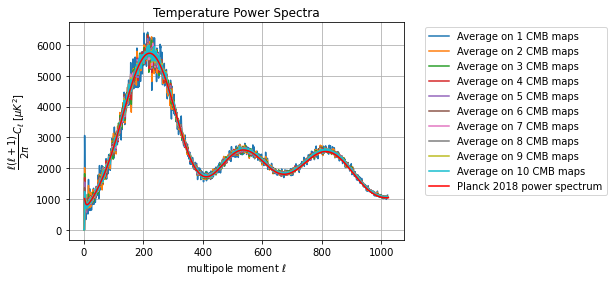

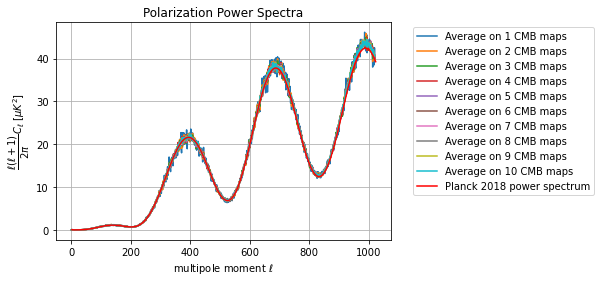

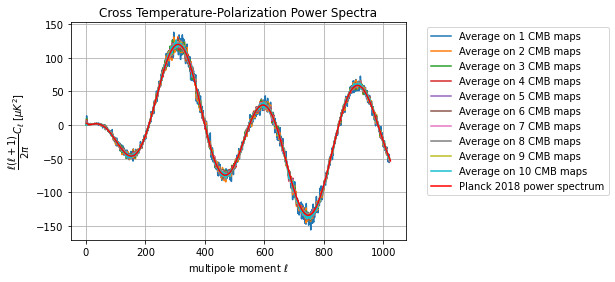

Plot of the averaged power spectra for the most CMB maps with repsect to the Planck 2018 ones:


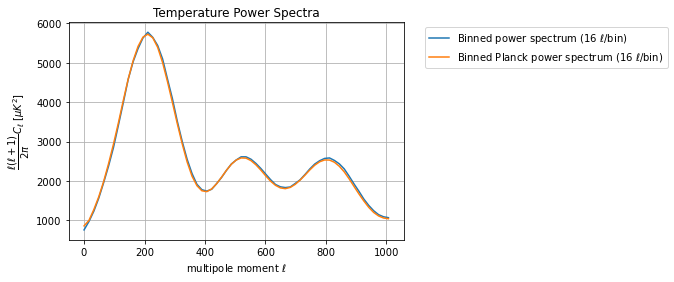

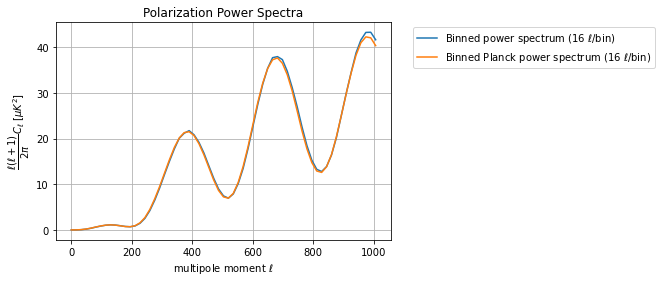

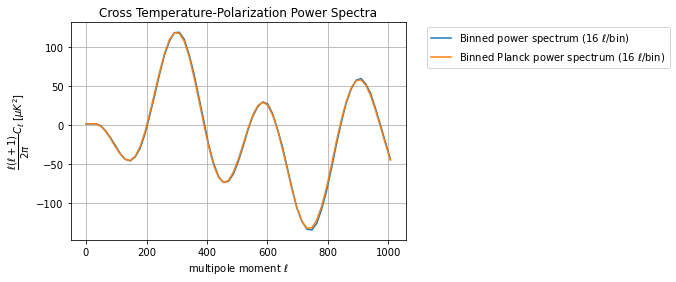

In [19]:
print("Plot of the evolution of the average power spectra with repsect to the Planck 2018 ones:")

for k in range(number_of_maps): # plot of the average TT power spectra
    plt.plot(y_average_CMB_PS[k][0][:-2], label='Average on %s CMB maps'%(k+1))

plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,1], color='r', linestyle='-', label='Planck 2018 power spectrum')
plt.title("Temperature Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

for k in range(number_of_maps): # plot of the average EE power spectra
    plt.plot(y_average_CMB_PS[k][1][:-2], label='Average on %s CMB maps'%(k+1))

plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,3], color='r', linestyle='-', label='Planck 2018 power spectrum')
plt.title("Polarization Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

for k in range(number_of_maps): # plot of the average TE power spectra
    plt.plot(y_average_CMB_PS[k][3][:-2], label='Average on %s CMB maps'%(k+1))

plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,2], color='r', linestyle='-', label='Planck 2018 power spectrum')
plt.title("Cross Temperature-Polarization Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()


print("Plot of the averaged power spectra for the most CMB maps with repsect to the Planck 2018 ones:")

# plot of the average TT power spectra
#plt.plot(y_average_CMB_PS[number_of_maps-1][0][:-2], label='Average on %s CMB maps'%(number_of_maps))
plt.plot(x_new,bin_means_list[number_of_maps-1][0][0], label='Binned power spectrum (%s $\ell$/bin)' %bin_size)
#plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,1], color='r', linestyle='-', label='Planck 2018 power spectrum')
plt.plot(x_new,bin_PLA_PS[0][1], label='Binned Planck power spectrum (%s $\ell$/bin)' %bin_size)
plt.title("Temperature Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

# plot of the average EE power spectra
#plt.plot(y_average_CMB_PS[number_of_maps-1][1][:-2], label='Average on %s CMB maps'%(number_of_maps))
plt.plot(x_new,bin_means_list[number_of_maps-1][0][1], label='Binned power spectrum (%s $\ell$/bin)' %bin_size)
#plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,3], color='r', linestyle='-', label='Planck 2018 power spectrum')
plt.plot(x_new,bin_PLA_PS[0][3], label='Binned Planck power spectrum (%s $\ell$/bin)' %bin_size)
plt.title("Polarization Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

# plot of the average TE power spectra
#plt.plot(y_average_CMB_PS[number_of_maps-1][3][:-2], label='Average on %s CMB maps'%(number_of_maps))
plt.plot(x_new,bin_means_list[number_of_maps-1][0][3], label='Binned power spectrum (%s $\ell$/bin)' %bin_size)
#plt.plot(PLA_best_PS[:lmax,0],PLA_best_PS[:lmax,2], color='r', linestyle='-', label='Planck 2018 power spectrum')
plt.plot(x_new,bin_PLA_PS[0][2], label='Binned Planck power spectrum (%s $\ell$/bin)' %bin_size)
plt.title("Cross Temperature-Polarization Power Spectra")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

Plot of the difference between the average power spectra and the Planck 2018 ones

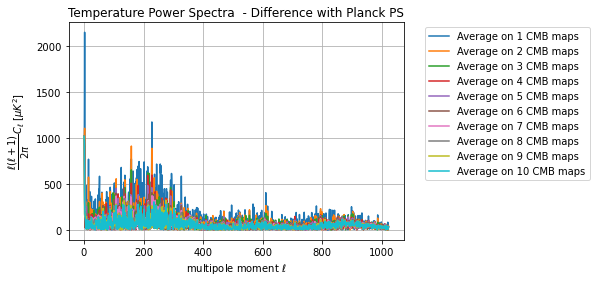

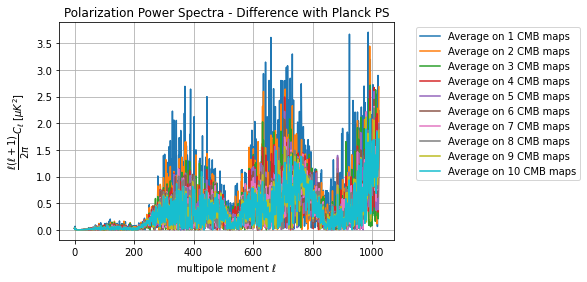

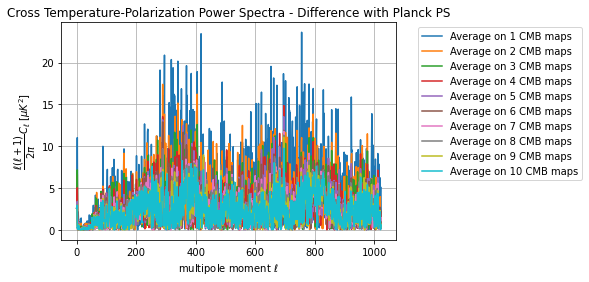

In [20]:
for k in range(number_of_maps): # plot of the average TT power spectra
    plt.plot(ell,y_subtraction[k][0], label='Average on %s CMB maps'%(k+1))

plt.title("Temperature Power Spectra  - Difference with Planck PS")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

for k in range(number_of_maps): # plot of the average EE power spectra
    plt.plot(ell,y_subtraction[k][1], label='Average on %s CMB maps'%(k+1))

plt.title("Polarization Power Spectra - Difference with Planck PS")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

for k in range(number_of_maps): # plot of the average TE power spectra
    plt.plot(ell,y_subtraction[k][2], label='Average on %s CMB maps'%(k+1))

plt.title("Cross Temperature-Polarization Power Spectra - Difference with Planck PS")
plt.xlabel('multipole moment $\ell$')
plt.ylabel("$\dfrac{\ell(\ell+1)}{2\pi} C_\ell~[\mu K^2]$")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()